#Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
%matplotlib inline
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string 
nltk.download('wordnet')
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Data Scrapping

In [ ]:
# YELP_TOKEN = "hZDztBHpF7WLzGiuWgL-cxFXNCdu4igVG4T7E3UY5J8NdEEuwN1tNwHdlmdjUkEuPoCh3rAZ2E3WLPyflL2VOmCboEyCYBuC_K2DeYMETPTs4SGCruVMP6yEFV6mYXYx"

In [ ]:
#Fetch JSON for 50 restaurants in Toronto area
# r = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [ ]:
# data = r.json()
# data

In [ ]:
# df = pd.DataFrame(data['businesses'])

In [ ]:
# df.head(3)

In [ ]:
# df.shape

In [ ]:
#fetch next 50 restuarants
# r1 = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50&offset=51", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [ ]:
# data1 = r1.json()
# data1

In [ ]:
# df1 = pd.DataFrame(data1['businesses'])
# df1.head(3)

In [ ]:
# df = pd.concat([df,df1])
# df.head(3)

In [ ]:
# df.shape

In [ ]:
# offset = 101

# while offset < 902:

#   url = 'https://api.yelp.com/v3/businesses/search'
#   parameters = {
#     'location' :'Toronto,ON',
#     'term': 'Restaurants',
#     'limit':50,
#     'offset':offset
#   }
#   r = requests.get(url, headers={"Authorization": "Bearer %s" % YELP_TOKEN},params=parameters)
#   data_p = r.json()
#   df_up = pd.DataFrame(data_p['businesses'])
#   df = pd.concat([df,df_up])
#   offset +=50



In [ ]:
# df.head(3)

In [ ]:
# df.shape

In [ ]:
# df.reset_index(inplace=True)

In [ ]:
# df.to_csv('Toronto_restuarnts.csv')

In [ ]:
# df.iloc[1,6]

In [ ]:
# df.isnull().sum()

In [ ]:
# df['url'][80]

In [ ]:
# review_labels = []

# for i in range(0,df.shape[0]):
#   start_count = 0
#   print(i)
#   reviews_raw = BeautifulSoup(requests.get(str(df.iloc[i,6]) +'&start=%s' %start_count).content, 
#                               'html.parser').find_all(class_="comment__09f24__gu0rG css-1sufhje")
#   reviews_count = len(reviews_raw)
#   print(reviews_count)
#   while reviews_count != 0 and start_count <= 20 :
#     print('reviews_count - %s \n' %reviews_count)
#     print('start_count - %s \n\n' %start_count)
#     for rev in reviews_raw:
#       rev_desc = rev.get_text().strip('\n')
#       if(len(rev_desc) > 0):
#         try:
#           review_rating = rev.findNext("meta")['content']
#           review_labels.append((df.iloc[i,3],df.iloc[i,8],rev_desc,review_rating))
#         except:
#           start_count = 20


#     start_count += 20
#     reviews_raw = BeautifulSoup(requests.get(df.iloc[i,6]+'&start=%s' %start_count).content, 
#                                 'html.parser').find_all(class_="comment__09f24__gu0rG css-1sufhje")




In [ ]:
# len(review_labels)

In [ ]:
# review_labels

In [ ]:
# reviews_df = pd.DataFrame(review_labels, columns =['Name','categories','Review','Rating'])
# reviews_df

In [ ]:
# str(df.iloc[76,6])

In [ ]:
# reviews_df.to_csv('Review_csv_1.csv')

In [ ]:
# reviews_raw = BeautifulSoup(requests.get(str(df.iloc[77,6])).content, 'html.parser').find_all(class_="comment__09f24__gu0rG css-1sufhje")
# reviews_raw

In [ ]:
# review_labels = []

# for i in range(76,df.shape[0]):
#   start_count = 0
#   print(i)
#   reviews_raw = BeautifulSoup(requests.get(str(df.iloc[i,6])).content, 'html.parser').find_all(class_="comment__09f24__gu0rG css-1sufhje")
#   reviews_count = len(reviews_raw)
#   print(reviews_count)
#   print('reviews_count - %s \n' %reviews_count)
#   if(reviews_count) >0:
#     for rev in reviews_raw:
#       rev_desc = rev.get_text().strip('\n')
#       if(len(rev_desc) > 0):
#         try:
#           review_rating = rev.findNext("meta")['content']
#           review_labels.append((df.iloc[i,3],df.iloc[i,8],rev_desc,review_rating))
#         except:
#           break

In [ ]:
# df_1 = pd.read_csv('Review_csv_1.csv')
# df_2 = pd.read_csv('Review_csv_2.csv')
# df_3 = pd.read_csv('Review_csv_3.csv')
# df_4 = pd.read_csv('Review_csv_4.csv')

In [ ]:
# df_review = pd.concat([df_1,df_2,df_3,df_4])

In [ ]:
# df_review.drop(df_review.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
# df_review.to_csv("df_review.csv",index=False)

#EDA

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

# df_review = pd.read_csv('df_review.csv')
# df_review.head()

Mounted at /content/drive/


In [ ]:
df_review = pd.read_csv('/content/drive/My Drive/dataset/df_reviews.csv',header = 0)
df_review.drop('Unnamed: 0',axis=1,inplace= True)
df_review.head(2)
# df_review.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RestaurantsTableService,WiFi,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,RestaurantsGoodForGroups,HappyHour,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Ambience,HasTV,Alcohol,GoodForMeal,DogsAllowed,RestaurantsTakeOut,NoiseLevel,RestaurantsAttire,RestaurantsDelivery,GoodForKids,ByAppointmentOnly,AcceptsInsurance,HairSpecializesIn,GoodForDancing,BestNights,Music,BYOB,CoatCheck,Smoking,DriveThru,Corkage,BYOBCorkage,RestaurantsCounterService,DietaryRestrictions,AgesAllowed,Open24Hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,review_id,user_id,stars_y,useful,funny,cool,text,date
0,NaN,u'no',NaN,True,NaN,False,False,True,NaN,NaN,2.0,"{'romantic': False, 'intimate': False, 'classy...",False,u'none',"{'dessert': False, 'latenight': False, 'lunch'...",False,True,u'average',u'casual',True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,bob likes thai food,3755 main st,vancouver,bc,V5V,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,NUiVdF9nvNcjYVNRXBE2oA,rS_OV4vl9rH61hd7w97Z-w,3,0,0,0,Decent food at reasonable prices. Ambiance is ...,2012-08-14 23:07:14
1,NaN,u'no',NaN,True,NaN,False,False,True,NaN,NaN,2.0,"{'romantic': False, 'intimate': False, 'classy...",False,u'none',"{'dessert': False, 'latenight': False, 'lunch'...",False,True,u'average',u'casual',True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,bob likes thai food,3755 main st,vancouver,bc,V5V,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,_nQL_bOYcvPzJ_CgW8fn0A,DCJ4QsuWEeugPSg5mf_Lag,4,1,1,1,"Good food, and good sized portions for the pri...",2016-05-19 06:56:54


In [ ]:
df_review.shape

(46929, 73)

## Visualize the food categories with top reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


120

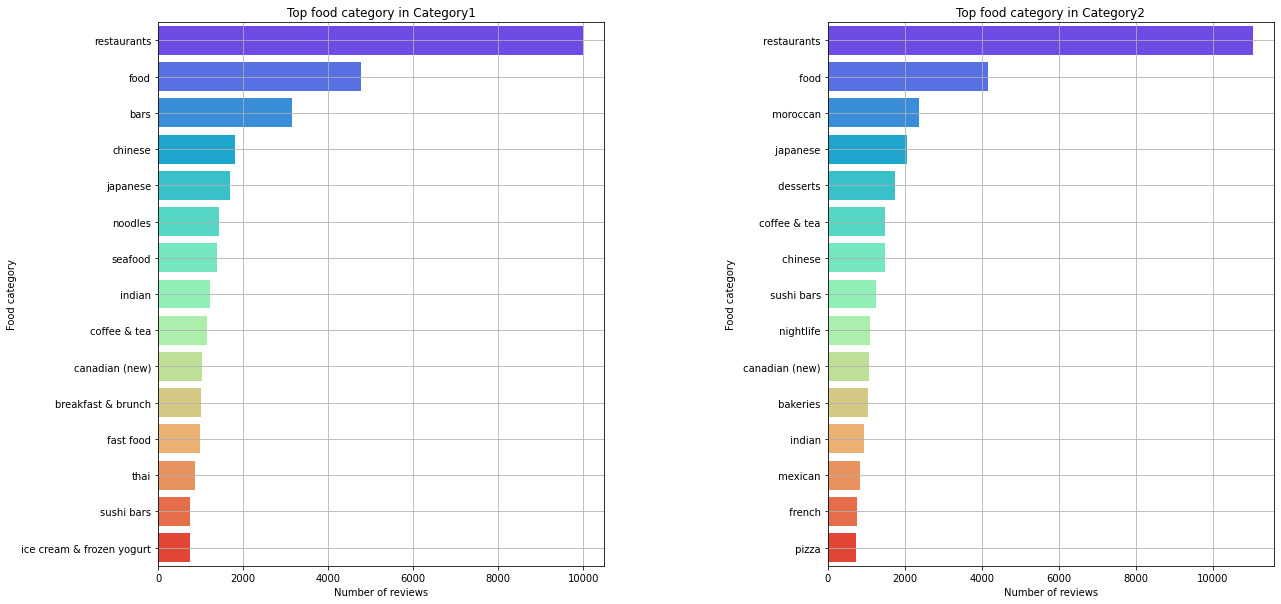

In [ ]:
f,ax = plt.subplots(1,2, figsize=(20,10))

ax1,ax2, = ax.flatten()
cnt = df_review['category1'].value_counts()[:15].to_frame()

sns.barplot(cnt['category1'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('Number of reviews')
ax1.set_ylabel('Food category')
ax1.set_title('Top food category in Category1')
ax1.grid()

cnt = df_review['category2'].value_counts()[:15].to_frame()

sns.barplot(cnt['category2'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('Number of reviews')
ax2.set_ylabel('Food category')
ax2.set_title('Top food category in Category2')
ax2.grid()

plt.subplots_adjust(wspace=0.5)

gc.collect()

In [ ]:
df_review.isnull().count()

RestaurantsTableService       46929
WiFi                          46929
BusinessAcceptsCreditCards    46929
RestaurantsReservations       46929
WheelchairAccessible          46929
                              ...  
useful                        46929
funny                         46929
cool                          46929
text                          46929
date                          46929
Length: 73, dtype: int64

## Removing unnecessary columns

In [ ]:
# df_review.drop(['category3','category4','category5','category6','category7','category8','category9','category10'],axis=1, inplace=True)

In [ ]:
df_review.drop(['RestaurantsTableService','WiFi','RestaurantsReservations','WheelchairAccessible','Caters','OutdoorSeating','RestaurantsGoodForGroups','HappyHour','BusinessAcceptsBitcoin'],axis=1, inplace=True)

In [ ]:
df_review.drop(['name',	'address',	'city',	'state',	'postal_code'],axis=1, inplace=True)

In [ ]:
df_review.drop(df_review.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]],axis=1, inplace=True)

In [ ]:
df_review.drop(['review_id'],axis=1, inplace=True)

In [ ]:
df_review.head()

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date
0,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,rS_OV4vl9rH61hd7w97Z-w,3,0,0,0,Decent food at reasonable prices. Ambiance is ...,2012-08-14 23:07:14
1,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,DCJ4QsuWEeugPSg5mf_Lag,4,1,1,1,"Good food, and good sized portions for the pri...",2016-05-19 06:56:54
2,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,xS9EBzNHTHeasB-ZusKD3w,4,0,0,0,The name of the venue is intriguing but after ...,2015-08-07 13:38:04
3,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,cgBbVjFPNh8dbCD-Xxfu_A,4,0,0,0,Really good Thai food. Had been looking a dece...,2016-09-06 13:17:00
4,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,tBrRbxfZnF3Fs10rA9JwZw,5,0,0,0,Bookmarked AND the hubby recommended it. Our f...,2016-04-12 04:14:38


#Pre-processing

## Lemmatize

In [ ]:
# !python -m textblob.download_corpora

In [ ]:
#Lemmatization
from textblob import Word

df_review['text']=df_review['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_review['text'].head()

0    Decent food at reasonable prices. Ambiance is ...
1    Good food, and good sized portion for the pric...
2    The name of the venue is intriguing but after ...
3    Really good Thai food. Had been looking a dece...
4    Bookmarked AND the hubby recommended it. Our f...
Name: text, dtype: object

## Save to csv file

In [ ]:
df_review.to_csv('df_review_lem.csv')

## Read from csv file

In [ ]:
rest_reviews_1=pd.read_csv("df_review_lem.csv")
rest_reviews_1.drop('Unnamed: 0',axis=1,inplace= True)

In [ ]:
rest_reviews_1.head()

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date
0,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,rS_OV4vl9rH61hd7w97Z-w,3,0,0,0,Decent food at reasonable prices. Ambiance is ...,2012-08-14 23:07:14
1,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,DCJ4QsuWEeugPSg5mf_Lag,4,1,1,1,"Good food, and good sized portion for the pric...",2016-05-19 06:56:54
2,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,xS9EBzNHTHeasB-ZusKD3w,4,0,0,0,The name of the venue is intriguing but after ...,2015-08-07 13:38:04
3,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,cgBbVjFPNh8dbCD-Xxfu_A,4,0,0,0,Really good Thai food. Had been looking a dece...,2016-09-06 13:17:00
4,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,tBrRbxfZnF3Fs10rA9JwZw,5,0,0,0,Bookmarked AND the hubby recommended it. Our f...,2016-04-12 04:14:38


## Handle missing values in [BusinessAcceptsCreditCards] column

In [ ]:
# Check missing values
rest_reviews_1.BusinessAcceptsCreditCards.unique()

array([nan, True, False], dtype=object)

In [ ]:
# Replace missing values by True
rest_reviews_1["BusinessAcceptsCreditCards"].fillna(True, inplace = True)

## Sentiment Analyzing

In [ ]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

'''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''

# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
rest_reviews_1['clear_text'] = rest_reviews_1['text'].apply(preprocess)


def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity


rest_reviews_1['sentiment'] = rest_reviews_1['clear_text'].apply(sentiment)
rest_reviews_1

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date,clear_text,sentiment
0,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,rS_OV4vl9rH61hd7w97Z-w,3,0,0,0,Decent food at reasonable prices. Ambiance is ...,2012-08-14 23:07:14,decent food reasonable prices ambiance odd though,0.066667
1,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,DCJ4QsuWEeugPSg5mf_Lag,4,1,1,1,"Good food, and good sized portion for the pric...",2016-05-19 06:56:54,good food good sized portion price enjoyed dis...,0.219444
2,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,xS9EBzNHTHeasB-ZusKD3w,4,0,0,0,The name of the venue is intriguing but after ...,2015-08-07 13:38:04,name venue intriguing dinner bob like thai foo...,0.117297
3,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,cgBbVjFPNh8dbCD-Xxfu_A,4,0,0,0,Really good Thai food. Had been looking a dece...,2016-09-06 13:17:00,really good thai food looking decent place mou...,0.266667
4,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,tBrRbxfZnF3Fs10rA9JwZw,5,0,0,0,Bookmarked AND the hubby recommended it. Our f...,2016-04-12 04:14:38,bookmarked hubby recommended first time also b...,0.161090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46924,True,2.0,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,8:0-21:30,8:0-21:30,F2fDbqmEnD36w7eDKIIIoQ,49.287583,-123.116750,3.5,79,1,restaurants,sandwiches,salad,soup,delis,none,none,none,none,none,TgG3J58v5bEhMB8YCQ1TbQ,5,2,0,0,Tractor is definitely my GO-TO place for lunch...,2015-11-21 16:36:32,tractor definitely goto place lunch love conce...,0.303571
46925,True,2.0,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,8:0-21:30,8:0-21:30,F2fDbqmEnD36w7eDKIIIoQ,49.287583,-123.116750,3.5,79,1,restaurants,sandwiches,salad,soup,delis,none,none,none,none,none,s8Ax6EPrxB2s2p9tKYMCjw,3,0,0,0,The food here is pretty good and it's affordab...,2017-10-14 03:05:39,food pretty good affordable would nice switche...,0.170000
46926,True,2.0,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,8:0-21:30,8:0-21:30,F2fDbqmEnD36w7eDKIIIoQ,49.287583,-123.116750,3.5,79,1,restaurants,sandwiches,salad,soup,delis,none,none,none,none,none,98ILF-C8V7fOPD6-7mflhQ,5,0,0,0,First time visiting Vancouver it wa late after...,2015-07-07 02:21:47,first time visiting vancouver wa late afternoo...,0.281000
46927,True,2.0,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,8:0-21:30,8:0-21:30,F2fDbqmEnD36w7eDKIIIoQ,49.287583,-123.116750,3.5,79,1,restaurants,sandwiches,salad,soup,delis,none,none,none,none,none,04SXsozZIwlSb_HntwXPAA,4,1,1,1,Fresh delicious salad bowl at high end price a...,2018-08-16 21:18:28,fresh delicious salad bowl high end price casu...,0.332000


## Save processed reviews to csv file

In [ ]:
rest_reviews_1.to_csv('rest_review_processed.csv')

## Read from csv file

In [ ]:
rest_reviews_2=pd.read_csv("rest_review_processed.csv")
rest_reviews_2.drop('Unnamed: 0',axis=1,inplace= True)
# rest_reviews_2

## Check unique business ids

In [ ]:
rest_reviews_2.business_id.nunique()

1124


It is observed that one business_id has multiple reviews which makes 46929 rows,while the no of unique business_ids are 1124 hence taking the sentipolarity and grouping them by business_id we get 1124 tuples

In [ ]:
senti = rest_reviews_2.groupby(rest_reviews_2.business_id)['sentiment'].mean().sort_values(ascending=True)

In [ ]:
df_sent = pd.DataFrame(senti)
df_sent

,sentiment
business_id,
ayrV0x64QgpIT9PRGg3CXg,-0.437662
MELqzLduBgNZjE3CaZ3COQ,-0.360000
Z-3ZKH9h-Njv1OrpFpY1UA,-0.297222
oFjfL8owpAE1xEDGofxqtw,-0.284848
GufvKqLltzYHW7zd_dLWgw,-0.250717
...,...
nQozrL-gYV3MWhucyW2kTQ,0.500000
FtIqH-mw1r-t2igB5SDeRw,0.545810
mmbCCbwZxO2I5LmtAwYn0w,0.574628


## Read Toronto Restaurants dataset

In [ ]:
Toronto_restuarnts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/restaurant-reviews-dataset/Toronto_restuarnts.csv',header = 0)
Toronto_restuarnts.drop('Unnamed: 0',axis=1,inplace= True)

## Merge reviews and restaurants datasets

In [ ]:
Toronto_restuarnts_merged = pd.merge(Toronto_restuarnts, df_sent, how='inner', on='business_id')

## Drop unused columns

In [ ]:
Toronto_restuarnts_merged.drop(['address',	'city',	'state',	'postal_code','latitude','longitude'],axis=1, inplace=True)

In [ ]:
# Toronto_restuarnts_merged.drop(['category3','category4','category5','category6','category7','category8','category9','category10'],axis=1, inplace=True)
Toronto_restuarnts_merged.drop(['RestaurantsTableService','WiFi','RestaurantsReservations','WheelchairAccessible','Caters','OutdoorSeating','RestaurantsGoodForGroups','HappyHour','BusinessAcceptsBitcoin'],axis=1, inplace=True)
Toronto_restuarnts_merged.drop(Toronto_restuarnts_merged.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]],axis=1, inplace=True)
Toronto_restuarnts_merged["BusinessAcceptsCreditCards"].fillna(True, inplace = True)
Toronto_restuarnts_merged.head()


,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
0,True,2,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,bob likes thai food,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,0.210190
1,True,2,0:0-0:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,QciD6FbNklaJvUbLExD4Nw,argo,4.0,76,1,food delivery services,food,restaurants,mediterranean,greek,pizza,none,none,none,none,0.262778
2,True,2,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,Xi2GGNzOiUS8r6WCFvu-fw,kerala kitchen,4.0,9,1,indian,restaurants,none,none,none,none,none,none,none,none,0.329016
3,True,NaN,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,NaN,wNR3CP5cbR--7MU0DkwBtw,chocolaterie bernard callebaut,5.0,5,1,specialty food,candy stores,chocolatiers & shops,food,none,none,none,none,none,none,0.382641
4,True,1,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,OfA_4cHgvlknHMcn0qNs2w,little caesars,1.0,9,1,restaurants,pizza,none,none,none,none,none,none,none,none,-0.181827


## Save merged dataset to csv file

In [ ]:
Toronto_restuarnts_merged.to_csv("final_data.csv")

In [ ]:
final_df = pd.read_csv("final_data.csv")
final_df.drop('Unnamed: 0',axis=1,inplace= True)
final_df

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
0,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,bob likes thai food,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,0.210190
1,True,2.0,0:0-0:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,QciD6FbNklaJvUbLExD4Nw,argo,4.0,76,1,food delivery services,food,restaurants,mediterranean,greek,pizza,none,none,none,none,0.262778
2,True,2.0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,Xi2GGNzOiUS8r6WCFvu-fw,kerala kitchen,4.0,9,1,indian,restaurants,none,none,none,none,none,none,none,none,0.329016
3,True,NaN,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,NaN,wNR3CP5cbR--7MU0DkwBtw,chocolaterie bernard callebaut,5.0,5,1,specialty food,candy stores,chocolatiers & shops,food,none,none,none,none,none,none,0.382641
4,True,1.0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,OfA_4cHgvlknHMcn0qNs2w,little caesars,1.0,9,1,restaurants,pizza,none,none,none,none,none,none,none,none,-0.181827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,True,2.0,NaN,NaN,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,S3NsRmPe6dVj5OEfZqQ6Fw,makoto japanese restaurant,3.5,51,1,sushi bars,japanese,restaurants,none,none,none,none,none,none,none,0.162567
1120,True,2.0,11:0-23:30,11:0-23:30,11:0-23:30,11:0-23:30,11:0-23:30,11:0-23:30,11:0-23:30,mmbCCbwZxO2I5LmtAwYn0w,papa john's pizza,3.0,15,1,italian,pizza,restaurants,none,none,none,none,none,none,none,0.574628
1121,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UQB_RgPDphTJpeYhvsiSPQ,rokko japanese gourmet,4.0,10,1,japanese,restaurants,none,none,none,none,none,none,none,none,0.282755
1122,True,2.0,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,7:0-21:30,8:0-21:30,8:0-21:30,F2fDbqmEnD36w7eDKIIIoQ,tractor foods,3.5,79,1,restaurants,sandwiches,salad,soup,delis,none,none,none,none,none,0.275221


##Plotting the graphs of stars vs sentipolarity

Plotting the graph of stars vs sentiment to check the distribution of stars based on sentiment values.


Histograms of text length distributions for each star rating. 

Notice that there is a high number of 4-star and 5-star reviews.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


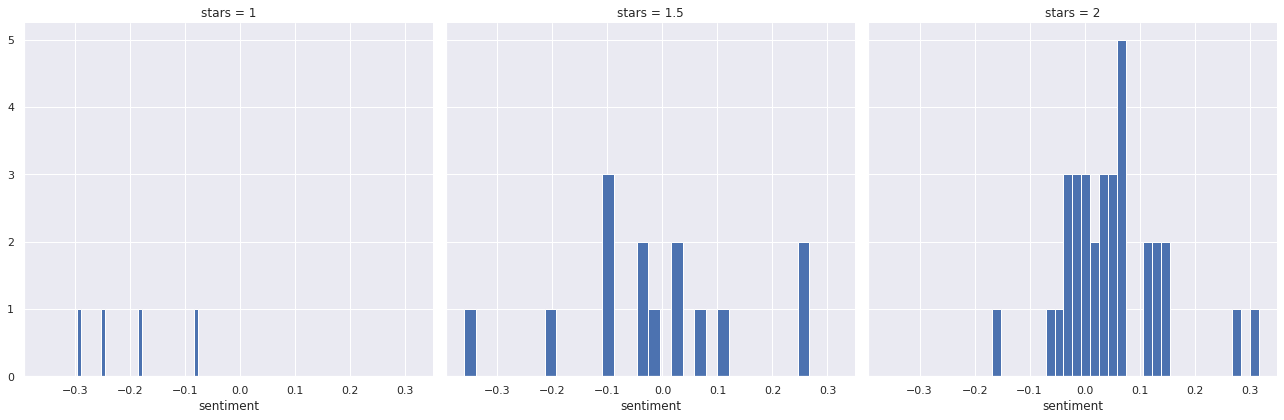

In [ ]:
sns.set(rc={'figure.figsize':(8 ,8)})
g = sns.FacetGrid(data=final_df, col='stars' ,col_order=[1,1.5,2],  size=6)

g.map(plt.hist, 'sentiment', bins=30)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


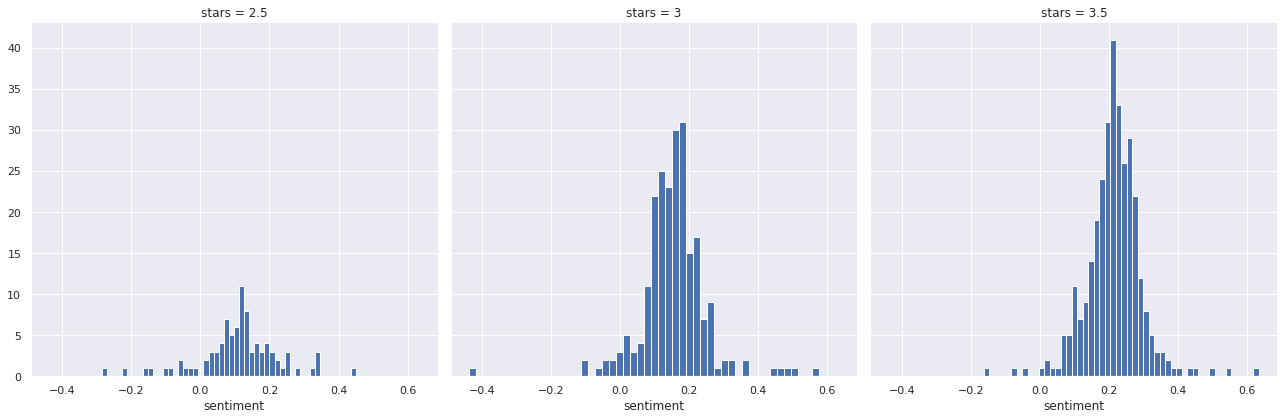

In [ ]:
g = sns.FacetGrid(data=final_df, col='stars',col_order=[2.5,3,3.5],  size=6)
g.map(plt.hist, 'sentiment', bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


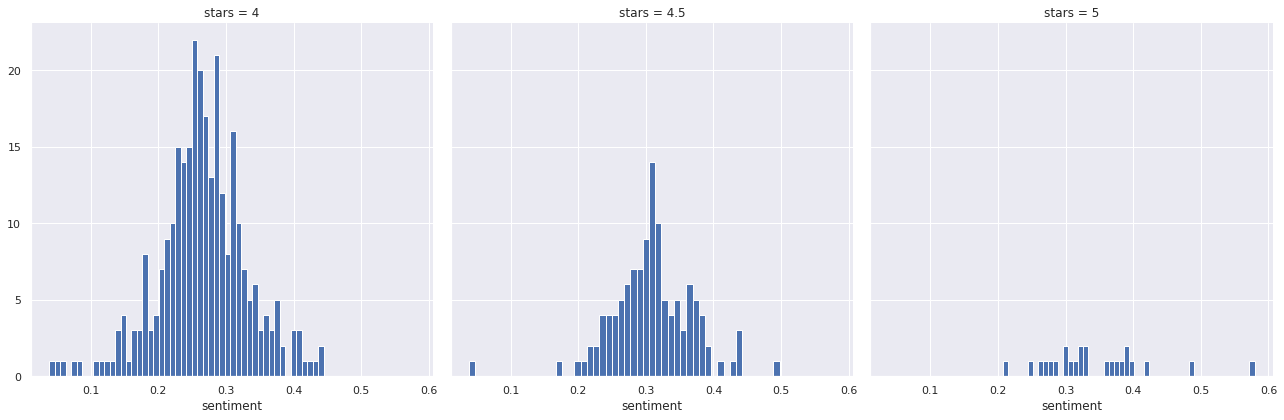

In [ ]:
g = sns.FacetGrid(data=final_df, col='stars',col_order=[4,4.5,5],  size=6)
g.map(plt.hist, 'sentiment', bins=50)

From the above graph we see that , stars more than 3, have most of the sentiment value distributed between the range 0 and 0.4.

##Rows that have values greater than 3 stars and sentiment value greater than 0.

In [ ]:
goodrest= final_df[(final_df['sentiment']>0) & (final_df['stars']>3.0)]
goodrest.head(3)

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
0,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,bob likes thai food,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,0.210190
1,True,2.0,0:0-0:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,QciD6FbNklaJvUbLExD4Nw,argo,4.0,76,1,food delivery services,food,restaurants,mediterranean,greek,pizza,none,none,none,none,0.262778
2,True,2.0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,Xi2GGNzOiUS8r6WCFvu-fw,kerala kitchen,4.0,9,1,indian,restaurants,none,none,none,none,none,none,none,none,0.329016


In [ ]:
indian = 'indian',
mexican = 'mexican',
thai = 'thai',
japanese = 'japanese',
italian = 'italian',
american_t = 'american (traditional)',
american_new = 'american (new)',
pakistani = 'pakistani',
mid_east = 'middle eastern',
chinese = 'chinese',
canadian_new = 'canadian (new)',
hungarian = 'hungarian',
german = 'german',
vietnamese = 'vietnamese',

business_type = 'indian','mexican','thai','japanese','italian','chinese','hungarian','german','vietnamese'



In [ ]:
rests = goodrest[['business_id']].astype(str).apply(lambda x: '->Rating: '.join(x), axis=1).tolist()

#Best restaurants in Canada

based on the stars and the highest sentiment values

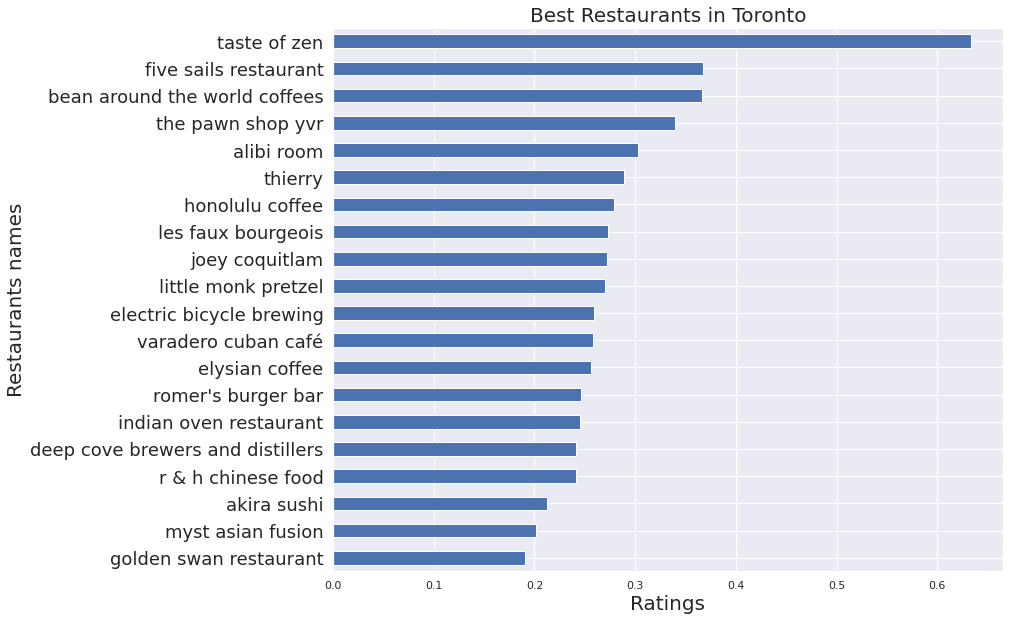

In [ ]:
top_restaurants = goodrest.business_id.value_counts().index[:20].tolist()
review_top = goodrest.loc[goodrest['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['sentiment'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)

# # print(goodrest['business_id'].isin(rests))
# top_review = goodrest.loc[goodrest['business_id'].isin(rests)]
# top_review = top_review.groupby(top_review.name)['sentiment'].mean().sort_values(ascending=False)[:30]
# top_review.plot(kind='barh',figsize=(15, 10))
# plt.yticks(fontsize=15)
plt.title('Best Restaurants in Toronto',fontsize=20)
plt.ylabel('Restaurants names', fontsize=20)
plt.xlabel('Ratings', fontsize=20)
plt.show()

Plotting WordCloud to find out the most frequently used words

In [ ]:
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

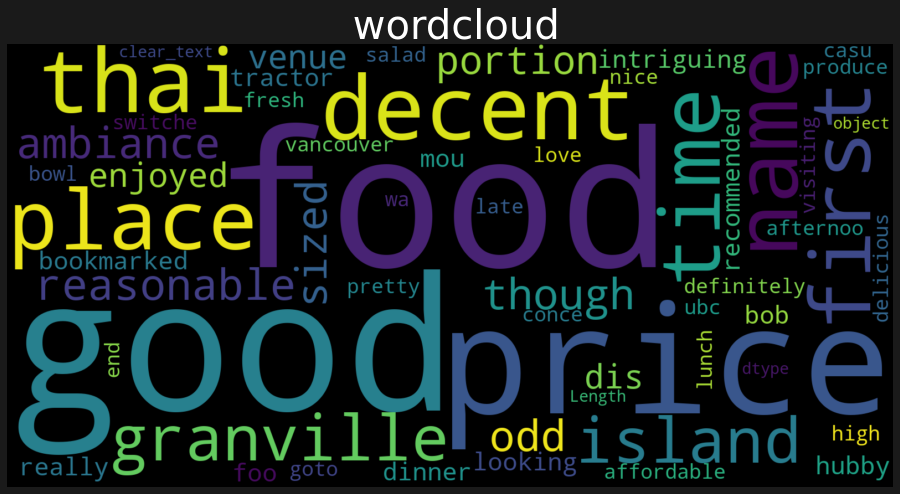

In [ ]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using clear_text
wc.generate(str(rest_reviews_1['clear_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

#The best restaurants for each cuisines.

##1. Indian cuisine

In [ ]:
rest_ind = goodrest.loc[(goodrest['category1'].isin(indian)) | (goodrest['category2'].isin(indian))| (goodrest['category3'].isin(indian)) | (goodrest['category4'].isin(indian)) |  (goodrest['category5'].isin(indian)) | (goodrest['category6'].isin(indian)) | (goodrest['category7'].isin(indian)) | (goodrest['category8'].isin(indian)) | (goodrest['category9'].isin(indian)) | (goodrest['category10'].isin(indian))]
rest_ind

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
2,True,2.0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,Xi2GGNzOiUS8r6WCFvu-fw,kerala kitchen,4.0,9,1,indian,restaurants,none,none,none,none,none,none,none,none,0.329016
127,True,2.0,11:0-3:0,11:0-3:0,11:0-3:0,11:0-3:0,11:0-3:0,11:0-3:0,11:0-3:0,VCiopspKLHelqobEsSeNxw,house of dosas,4.0,411,1,indian,pakistani,restaurants,ethnic food,food,beer,wine & spirits,specialty food,none,none,0.241773
161,True,2.0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-22:0,12:0-22:0,QxNVmWT2UXjbJrYuOqlCMQ,tandoori fusion,4.0,114,1,indian,restaurants,none,none,none,none,none,none,none,none,0.237959
164,True,2.0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,H_FnkCyewR2VktkY2y7g0A,mayuri south indian cuisine,4.0,36,1,indian,restaurants,none,none,none,none,none,none,none,none,0.317952
386,True,2.0,14:30-22:0,NaN,14:30-22:0,14:30-22:0,14:30-22:0,14:30-22:0,14:30-22:0,JigVm7F5xCzBBTmU4LFaDA,la tandoori,4.0,14,1,indian,pakistani,middle eastern,restaurants,none,none,none,none,none,none,0.340893
553,True,2.0,16:30-22:0,16:30-22:0,16:30-22:0,16:30-22:0,16:30-22:0,16:30-22:0,16:30-22:0,ykzWuSC4W5zFO6k0hdItcQ,indian delicacy,4.5,74,1,indian,restaurants,none,none,none,none,none,none,none,none,0.318646
558,True,2.0,11:0-21:30,11:0-21:30,11:0-21:30,11:0-2:0,11:0-2:0,11:0-2:0,11:0-2:0,5MnRr_uHnNDxvCcj0viYyQ,desi turka indian cuisine,4.0,58,1,indian,restaurants,buffets,none,none,none,none,none,none,none,0.250065
574,True,3.0,17:30-22:30,17:30-22:30,17:30-22:30,17:30-22:30,17:30-22:30,17:30-22:30,17:30-22:30,raZ-NDBs9S1j9fPONh4fWw,vij's restaurant,4.0,310,1,indian,restaurants,none,none,none,none,none,none,none,none,0.300009
672,True,2.0,16:0-22:0,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,usO5eH44mmub9p_pH95OkQ,delhi 6 indian bistro,4.5,104,1,indian,restaurants,none,none,none,none,none,none,none,none,0.376406
720,True,2.0,10:0-19:0,NaN,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,w5upfSHsC71wU9vI0irCTQ,kilimanjaro snack house and catering,4.0,21,1,indian,event planning & services,fast food,african,restaurants,caterers,mediterranean,none,none,none,0.149783


In [ ]:
incloud= rest_reviews_1.loc[(rest_reviews_1['category1'].isin(indian))]

In [ ]:
f1 = rest_ind[['name', 'stars']].astype(str).apply(lambda x: '->  Rating: '.join(x), axis=1).tolist()
f1

['kerala kitchen->  Rating: 4.0',
 'house of dosas->  Rating: 4.0',
 'tandoori fusion->  Rating: 4.0',
 'mayuri south indian cuisine->  Rating: 4.0',
 'la tandoori->  Rating: 4.0',
 'indian delicacy->  Rating: 4.5',
 'desi turka indian cuisine->  Rating: 4.0',
 "vij's restaurant->  Rating: 4.0",
 'delhi 6 indian bistro->  Rating: 4.5',
 'kilimanjaro snack house and catering->  Rating: 4.0']

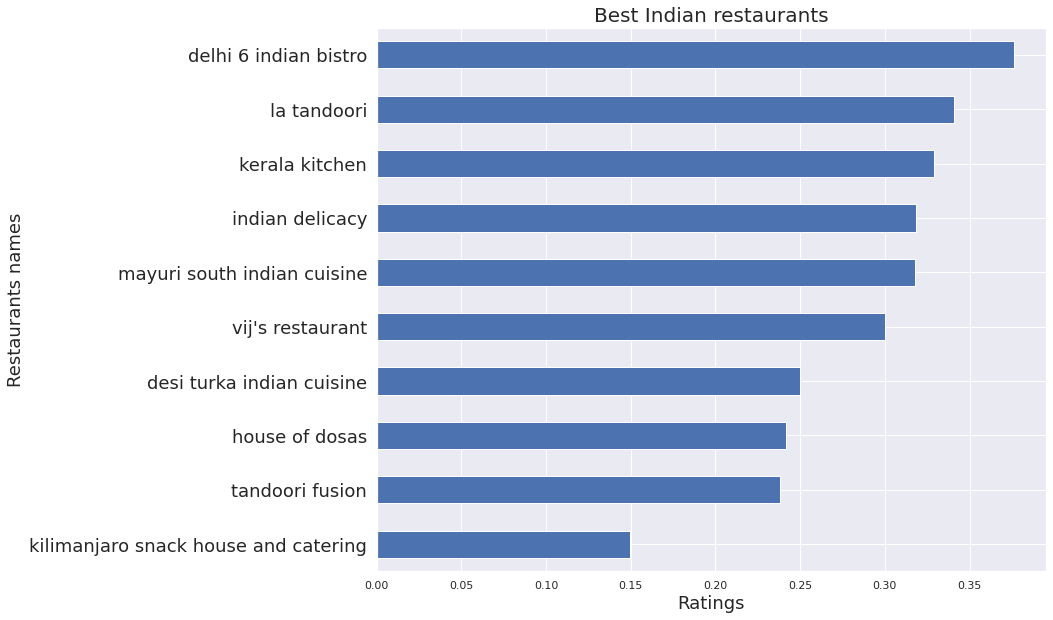

In [ ]:
top_restaurants = rest_ind.business_id.value_counts().index[:30].tolist()
review_top = rest_ind.loc[rest_ind['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['sentiment'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Best Indian restaurants',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

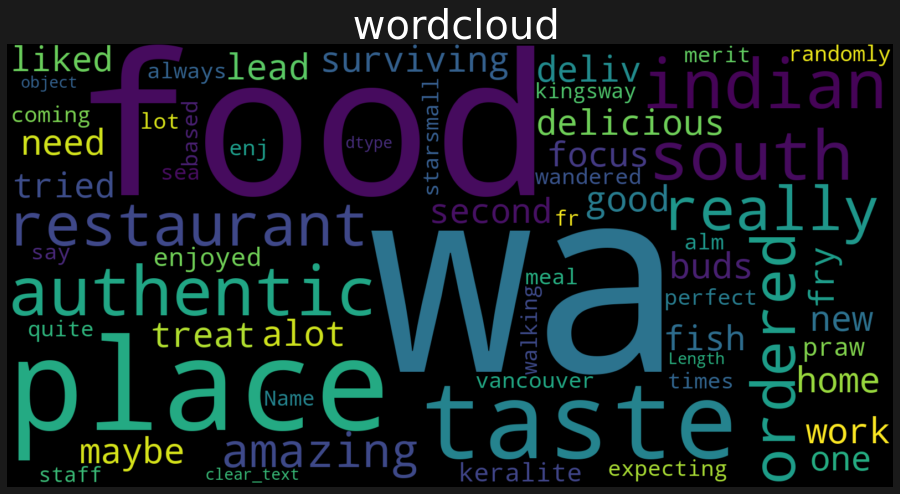

In [ ]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using clear_text
wc.generate(str(incloud['clear_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

##2. Italian cuisine

In [ ]:
itcloud= rest_reviews_1.loc[(rest_reviews_1['category1'].isin(italian))]


In [ ]:
rest_it = goodrest.loc[(goodrest['category1'].isin(italian)) | (goodrest['category2'].isin(italian)) | (goodrest['category3'].isin(italian)) | (goodrest['category4'].isin(italian)) | (goodrest['category5'].isin(italian)) | (goodrest['category6'].isin(italian)) | (goodrest['category7'].isin(italian)) | (goodrest['category8'].isin(italian)) | (goodrest['category9'].isin(italian)) | (goodrest['category10'].isin(italian))]
rest_it  

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
441,True,2.0,0:0-0:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,9:0-21:0,rLAFeOqX4go1jcN36IIIIQ,gusto a taste of italy,4.5,51,1,italian,restaurants,nightlife,cocktail bars,bars,desserts,food,pizza,cafes,none,0.288998
639,True,2.0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,k7-oClu97qColM6BcCaQMw,nook,4.0,286,1,italian,pizza,restaurants,none,none,none,none,none,none,none,0.308510
1030,True,2.0,17:0-22:0,17:0-22:0,11:30-22:0,11:30-22:0,11:30-23:0,10:30-23:0,10:30-22:0,QHwx44M5TtXiwqU_0-VfXg,nook,4.0,139,1,italian,restaurants,none,none,none,none,none,none,none,none,0.333814


In [ ]:
f2 = rest_it[['name', 'stars']].astype(str).apply(lambda x: '-> Rating: '.join(x), axis=1).tolist()
f2

['gusto a taste of italy-> Rating: 4.5',
 'nook-> Rating: 4.0',
 'nook-> Rating: 4.0']

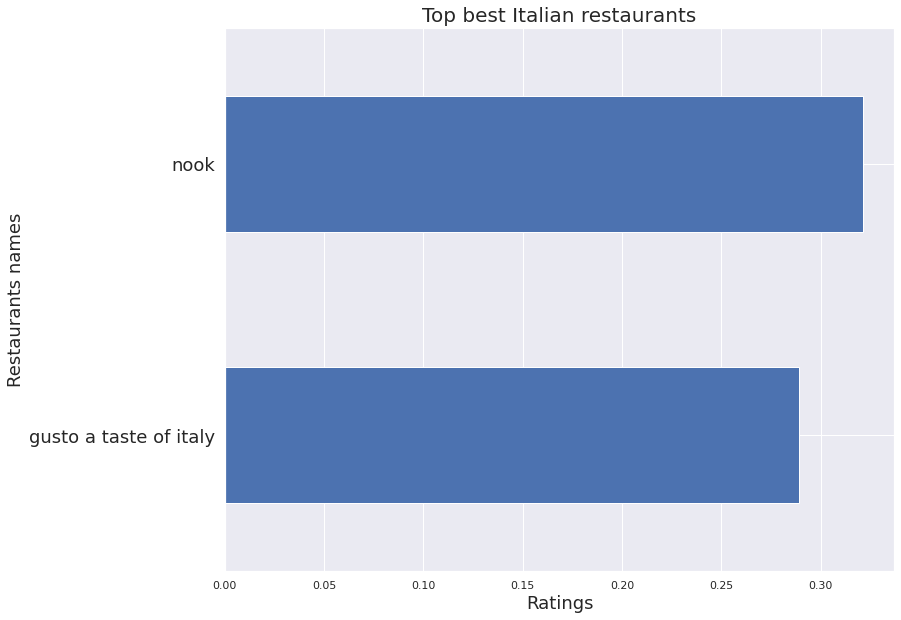

In [ ]:
top_restaurants = rest_it.business_id.value_counts().index[:20].tolist()
review_top = rest_it.loc[rest_it['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['sentiment'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best Italian restaurants',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

##3. Chinese cuisine

In [ ]:
foodon_ch = goodrest.loc[(goodrest['category1'].isin(chinese)) | (goodrest['category2'].isin(chinese)) | (goodrest['category3'].isin(chinese)) | (goodrest['category4'].isin(chinese)) | (goodrest['category5'].isin(chinese)) | (goodrest['category6'].isin(chinese)) | (goodrest['category7'].isin(chinese)) | (goodrest['category8'].isin(chinese)) | (goodrest['category9'].isin(chinese)) | (goodrest['category10'].isin(chinese))]
foodon_ch

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
27,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dd3moZV5D516pE9TcQnHsA,joyful seafood restaurant,3.5,17,1,chinese,restaurants,none,none,none,none,none,none,none,none,0.177014
57,True,2.0,NaN,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,EGsftsHMWmKF3mc2UQoQug,wah wing restaurant,3.5,72,1,chinese,restaurants,vegetarian,none,none,none,none,none,none,none,0.204539
151,True,1.0,0:0-0:0,8:30-14:30,8:30-14:30,8:30-14:30,8:30-14:30,9:30-15:0,9:30-15:0,_KK19pnL3xI45NzTikdJlA,me + crepe,4.0,26,1,chinese,breakfast & brunch,creperies,restaurants,none,none,none,none,none,none,0.263942
194,True,2.0,9:30-14:30,9:30-14:30,9:30-14:30,9:30-14:30,9:30-14:30,9:30-14:30,9:30-14:30,SR8nISkNDVfAwvE3VEogwA,golden swan restaurant,3.5,126,1,chinese,dim sum,seafood,restaurants,none,none,none,none,none,none,0.190239
263,True,2.0,11:0-2:0,11:0-2:0,11:0-2:0,11:0-2:0,11:0-3:0,11:0-3:0,11:0-2:0,RPnSUIZMRS5T8KsSI1dwMA,bubble world,3.5,163,1,chinese,coffee & tea,bubble tea,food,restaurants,taiwanese,none,none,none,none,0.149675
390,True,2.0,11:0-23:0,11:0-23:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,11:0-22:0,k7TgLsIoMU0x8O8WVFi0CQ,golden paramount seafood restaurant,3.5,36,1,chinese,seafood,restaurants,none,none,none,none,none,none,none,0.190189
398,True,NaN,17:0-23:0,17:0-23:0,17:0-23:0,17:0-23:0,17:0-23:0,17:0-23:0,17:0-23:0,LmfwRghV6BG5-zAR_3dW1A,fortune lamb dining,3.5,9,1,chinese,restaurants,seafood,none,none,none,none,none,none,none,0.126706
416,True,2.0,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,dF59gkEy4FcRBREppqNr0A,wonderful szechuan restaurant,3.5,43,1,chinese,restaurants,none,none,none,none,none,none,none,none,0.199348
460,True,1.0,11:0-19:30,11:0-19:30,11:0-19:30,11:0-19:30,11:0-19:30,11:0-19:30,NaN,9VPzKycFJAuq0C0GB1rPHQ,james snacks,4.5,23,1,chinese,food court,restaurants,none,none,none,none,none,none,none,0.213759
535,True,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,V4w2oMsWgZSmGKbbku9lKA,happy noodle house,4.5,9,1,chinese,dim sum,restaurants,noodles,none,none,none,none,none,none,0.349920


In [ ]:
chcloud=rest_reviews_1.loc[(rest_reviews_1['category1'].isin(chinese))]

In [ ]:
f3 = foodon_ch[['name', 'stars']].astype(str).apply(lambda x: '-> Rating: '.join(x), axis=1).tolist()

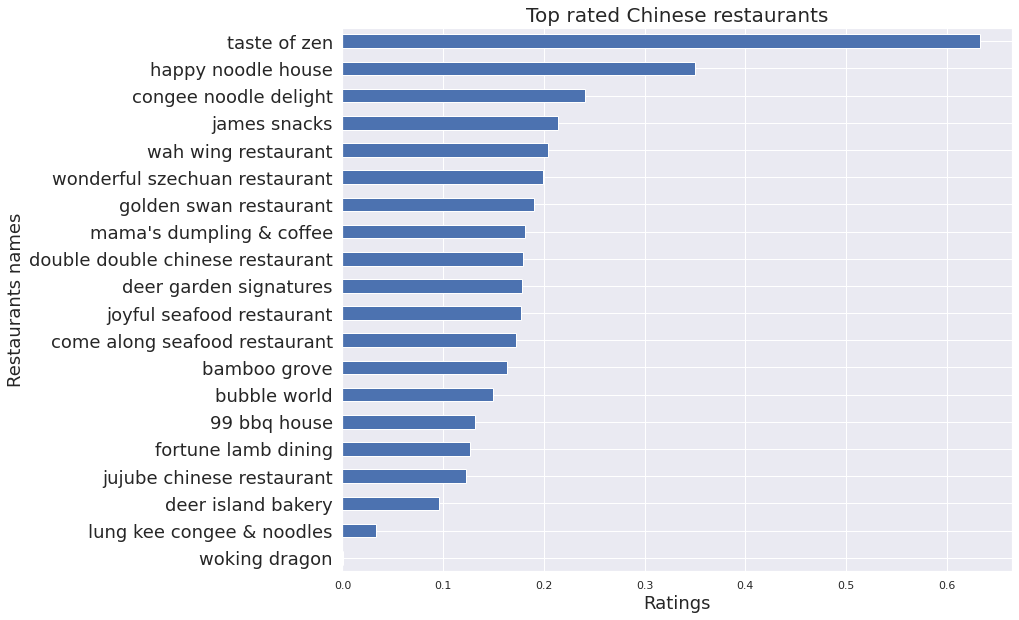

In [ ]:
top_restaurants = foodon_ch.business_id.value_counts().index[:20].tolist()
review_top = foodon_ch.loc[foodon_ch['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['sentiment'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated Chinese restaurants',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

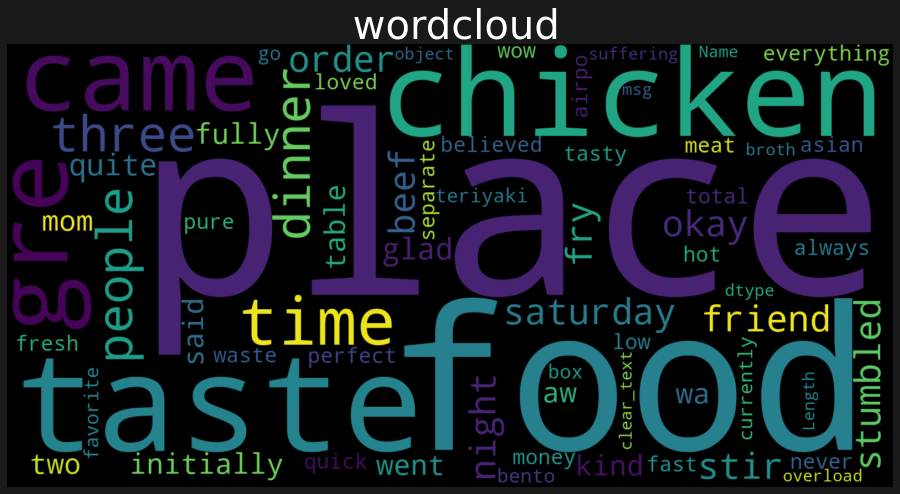

In [ ]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using clear_text
wc.generate(str(chcloud['clear_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

##4. Japanese cuisine

In [ ]:
foodon_jp = goodrest.loc[(goodrest['category1'].isin(japanese)) | (goodrest['category2'].isin(japanese)) | (goodrest['category3'].isin(japanese)) | (goodrest['category4'].isin(japanese)) | (goodrest['category5'].isin(japanese)) | (goodrest['category6'].isin(japanese)) | (goodrest['category7'].isin(japanese)) | (goodrest['category8'].isin(japanese)) | (goodrest['category9'].isin(japanese)) | (goodrest['category10'].isin(japanese))]
foodon_jp

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
23,True,2.0,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,11:30-21:30,12:0-21:30,mvCO6pRpfMB0_1GLlwgZRw,sushi california,3.5,280,1,japanese,restaurants,sushi bars,none,none,none,none,none,none,none,0.228708
182,True,1.0,11:30-20:0,11:30-20:0,11:30-20:0,11:30-20:0,11:30-20:0,11:30-20:0,NaN,WFZjl7vkiX8PdSRb4kt_Ww,mt fuji japanese restaurant,3.5,14,1,japanese,restaurants,none,none,none,none,none,none,none,none,0.248161
304,True,2.0,12:0-21:0,12:0-21:0,12:0-21:0,12:0-21:0,12:0-21:0,12:0-21:0,12:0-20:0,xfK9_bAM8JXiYMAV_yXKFQ,koi ramen & eatery,3.5,14,1,japanese,asian fusion,barbeque,restaurants,ramen,tapas/small plates,none,none,none,none,0.202176
319,True,2.0,0:0-0:0,17:0-21:30,17:0-21:30,17:0-21:30,17:0-22:0,17:0-22:0,17:0-21:0,wLPOdK7m6xQTMmJ7uQYK1Q,toyo sushi,3.5,10,1,japanese,sushi bars,restaurants,none,none,none,none,none,none,none,0.272995
332,True,2.0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,W-wR2RWSejKvy-3Bh3p9Fw,dunbar sushi,3.5,27,1,japanese,sushi bars,restaurants,none,none,none,none,none,none,none,0.280156
349,True,2.0,NaN,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,F5qWJO27UIzMmSObtD9Zeg,tetsu sushi bar,4.5,83,1,japanese,sushi bars,restaurants,none,none,none,none,none,none,none,0.275963
400,True,2.0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-0:0,11:0-0:0,11:0-23:0,4jM6Mvylg6eKUCh6HOdlKg,samurai japanese restaurant,3.5,259,1,japanese,restaurants,sushi bars,asian fusion,none,none,none,none,none,none,0.205743
401,True,2.0,16:30-21:30,16:30-21:30,16:30-21:30,16:30-21:30,16:30-23:0,16:30-23:0,16:30-21:30,G3jAGk0OUS_hkrsD4ERevA,sushimoto enterprises,4.0,116,1,japanese,sushi bars,restaurants,none,none,none,none,none,none,none,0.248800
424,True,1.0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-15:0,NaN,NaN,QTqbXOGwRJCyavINPVBRSw,spin roll sushi,4.0,27,1,japanese,sushi bars,restaurants,none,none,none,none,none,none,none,0.237231
497,True,3.0,17:30-21:15,NaN,17:30-21:15,17:30-21:15,17:30-21:15,17:30-21:15,17:30-21:15,j7VmHg9M-eWZuDw-p4AIaA,seto japanese restaurant,4.0,101,1,japanese,sushi bars,restaurants,none,none,none,none,none,none,none,0.224011


In [ ]:
jacloud= rest_reviews_1.loc[(rest_reviews_1['category1'].isin(japanese))]

In [ ]:
f4 = foodon_jp[['name', 'stars']].astype(str).apply(lambda x: '-> Rating: '.join(x), axis=1).tolist()
f4

['sushi california-> Rating: 3.5',
 'mt fuji japanese restaurant-> Rating: 3.5',
 'koi ramen & eatery-> Rating: 3.5',
 'toyo sushi-> Rating: 3.5',
 'dunbar sushi-> Rating: 3.5',
 'tetsu sushi bar-> Rating: 4.5',
 'samurai japanese restaurant-> Rating: 3.5',
 'sushimoto enterprises-> Rating: 4.0',
 'spin roll sushi-> Rating: 4.0',
 'seto japanese restaurant-> Rating: 4.0',
 'torafuku-> Rating: 3.5',
 'pepper lunch-> Rating: 3.5',
 'gaya sushi-> Rating: 3.5',
 'mr. black restaurant-> Rating: 3.5',
 'ki-isu japanese restaurant-> Rating: 3.5',
 'kadoya japanese restaurant-> Rating: 3.5',
 'nabebugyo-> Rating: 4.0',
 'mika sushi-> Rating: 3.5',
 'sansho sushi & japanese dining-> Rating: 4.5',
 'rokko japanese gourmet-> Rating: 4.0']

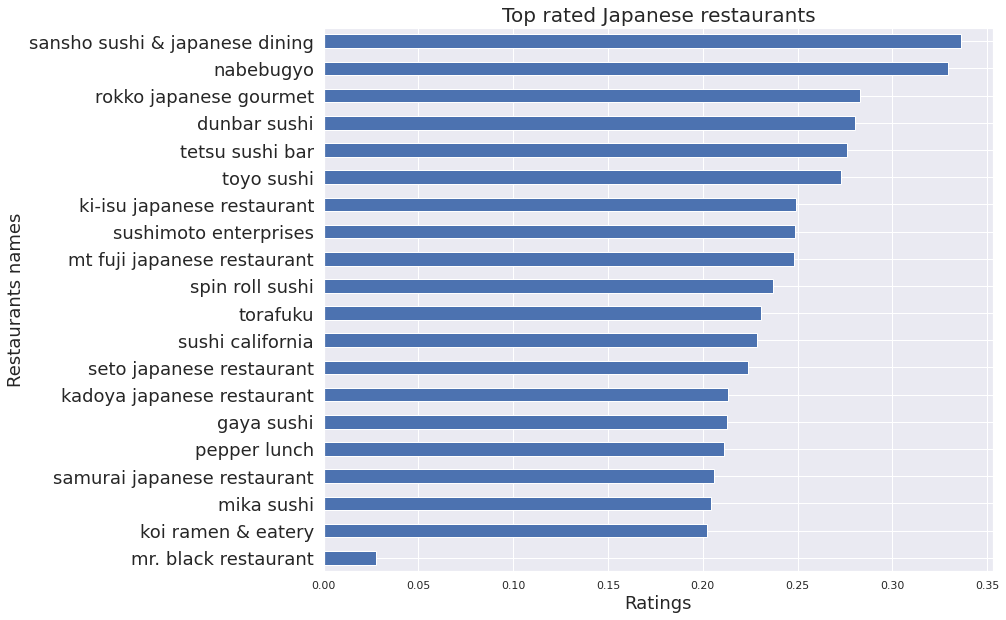

In [ ]:
top_restaurants = foodon_jp.business_id.value_counts().index[:20].tolist()
review_top = foodon_jp.loc[foodon_jp['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['sentiment'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated Japanese restaurants',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

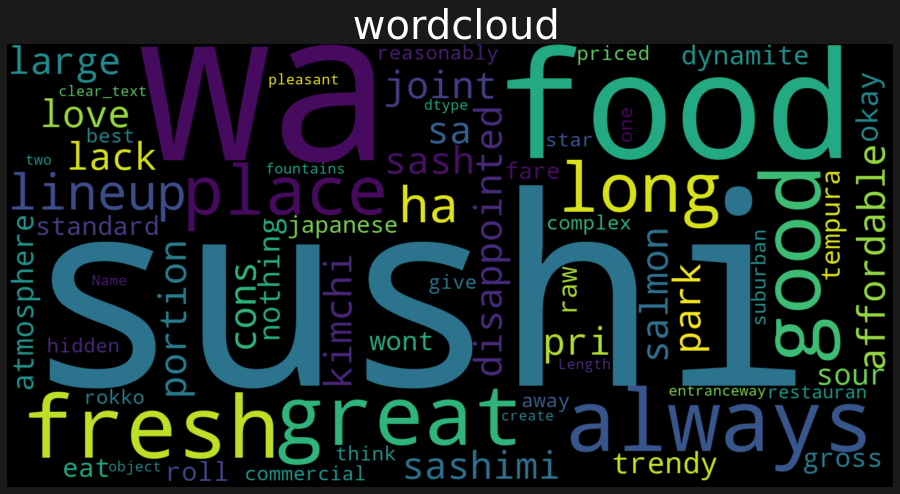

In [ ]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using clear_text
wc.generate(str(jacloud['clear_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

##5. Thai Cuisine

In [ ]:
foodon_th = goodrest.loc[(goodrest['category1'].isin(thai)) | (goodrest['category2'].isin(thai)) | (goodrest['category3'].isin(thai)) | (goodrest['category4'].isin(thai)) | (goodrest['category5'].isin(thai)) | (goodrest['category6'].isin(thai)) | (goodrest['category7'].isin(thai)) | (goodrest['category8'].isin(thai)) | (goodrest['category9'].isin(thai)) | (goodrest['category10'].isin(thai))]
foodon_th

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,name,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,sentiment
58,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7yf2-ax6xpxCXPpHHfNLA,mambo cafe,3.5,35,1,thai,chinese,food court,restaurants,none,none,none,none,none,none,0.216425
205,True,NaN,11:30-21:0,11:30-21:0,11:30-21:0,11:0-21:0,11:30-21:0,11:0-21:30,12:0-21:0,d22J2Qqi_iFF_eIBJkyblw,thai away home,3.5,7,1,thai,restaurants,none,none,none,none,none,none,none,none,0.176022
227,True,2.0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:30-21:0,NaN,FEFF1TpkB-D4QSnnLzRAMQ,nahm thai bistro,3.5,73,1,thai,restaurants,none,none,none,none,none,none,none,none,0.225100
288,True,2.0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,ztP4E-dCMEOZRT9XYLDNzw,maenam,4.0,346,1,thai,restaurants,none,none,none,none,none,none,none,none,0.287134
565,True,2.0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:30,11:30-21:30,12:0-21:0,ruI0SYCYc5cPRa6ystVDhw,thai away home,3.5,21,1,thai,restaurants,caterers,event planning & services,none,none,none,none,none,none,0.092703
588,True,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,IYyYpXSsD41g14_z-Zdtiw,kin kao thai kitchen,4.0,143,1,thai,restaurants,none,none,none,none,none,none,none,none,0.230723
913,True,2.0,0:0-0:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,FOQMrU2G_qvPuUjbB-mytg,thai new west,4.0,79,1,thai,restaurants,none,none,none,none,none,none,none,none,0.282480


In [ ]:
thcloud= rest_reviews_1.loc[(rest_reviews_1['category1'].isin(thai))]

In [ ]:
f5 = foodon_th[['name', 'stars']].astype(str).apply(lambda x: '->  Rating: '.join(x), axis=1).tolist()
f5

['mambo cafe->  Rating: 3.5',
 'thai away home->  Rating: 3.5',
 'nahm thai bistro->  Rating: 3.5',
 'maenam->  Rating: 4.0',
 'thai away home->  Rating: 3.5',
 'kin kao thai kitchen->  Rating: 4.0',
 'thai new west->  Rating: 4.0']

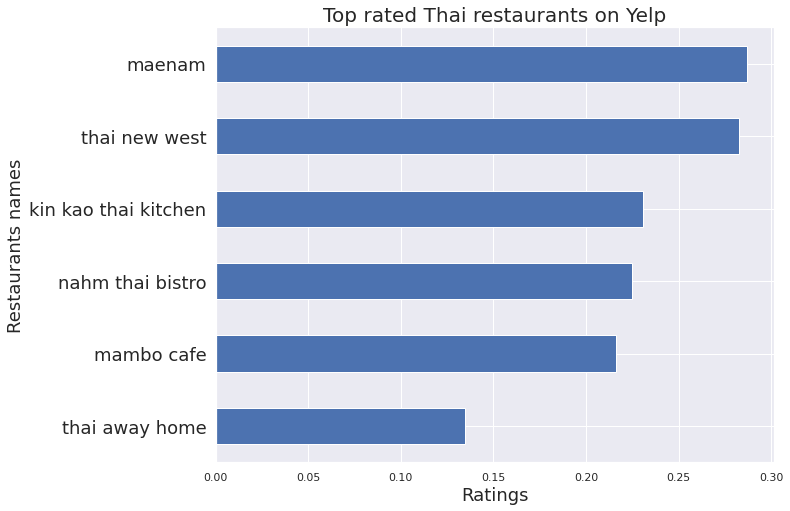

In [ ]:
top_restaurants = foodon_th.business_id.value_counts().index[:20].tolist()
review_top = foodon_th.loc[foodon_th['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['sentiment'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(10, 8))
plt.yticks(fontsize=18)
plt.title('Top rated Thai restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

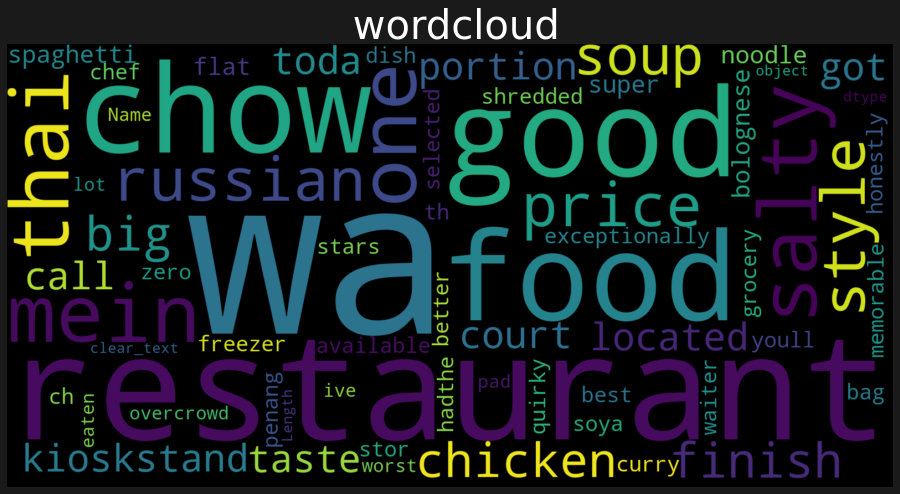

In [ ]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using clear_text
wc.generate(str(thcloud['clear_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

#Which is the best Restaurant for your favourite cuisine

In [ ]:
cuisinelist=['indian','mexican','thai','japanese','italian','chinese','hungarian','german','vietnamese']
cuisinelist

['indian',
 'mexican',
 'thai',
 'japanese',
 'italian',
 'chinese',
 'hungarian',
 'german',
 'vietnamese']

In [ ]:

# cuisine=input("Enter Cuisine: ")
# cuisine = cuisine.lower()
cuisine = 'thai'

In [ ]:
goodcuisine = goodrest[(goodrest['category1']).str.contains(cuisine) | (goodrest['category2']).str.contains(cuisine) | (goodrest['category3']).str.contains(cuisine) | (goodrest['category4']).str.contains(cuisine) | (goodrest['category5']).str.contains(cuisine) | (goodrest['category6']).str.contains(cuisine) | (goodrest['category7']).str.contains(cuisine) | (goodrest['category8']).str.contains(cuisine) | (goodrest['category9']).str.contains(cuisine) | (goodrest['category10']).str.contains(cuisine)]

for i in goodcuisine.index:
    #if goodcuisine.category1[i] == cuisine:
    final = goodcuisine[['name', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'sentiment']]

Information about the top 10 restaurants in the given cuisine

In [ ]:
f1=final.sort_values('sentiment', axis=0, ascending=False).head(10)
f1

,name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,sentiment
410,ma now thai kitchen,0:0-0:0,16:0-20:30,16:0-20:0,16:0-20:0,16:0-20:30,16:0-21:0,16:0-20:0,0.312667
624,khob khun thai cuisine,0:0-0:0,16:30-21:30,16:30-21:30,16:30-21:30,16:30-21:30,16:30-21:30,16:30-21:30,0.296080
288,maenam,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,0.287134
913,thai new west,0:0-0:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,0.282480
839,sen pad thai,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,0.280321
566,tip thai,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,16:0-21:0,0.237164
198,rice and noodle,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,0.236441
588,kin kao thai kitchen,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,0.230723
227,nahm thai bistro,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:30-21:0,NaN,0.225100
320,basil box,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,0.224156


In [ ]:
df_review.head()

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date
0,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,rS_OV4vl9rH61hd7w97Z-w,3,0,0,0,Decent food at reasonable prices. Ambiance is ...,2012-08-14 23:07:14
1,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,DCJ4QsuWEeugPSg5mf_Lag,4,1,1,1,"Good food, and good sized portion for the pric...",2016-05-19 06:56:54
2,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,xS9EBzNHTHeasB-ZusKD3w,4,0,0,0,The name of the venue is intriguing but after ...,2015-08-07 13:38:04
3,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,cgBbVjFPNh8dbCD-Xxfu_A,4,0,0,0,Really good Thai food. Had been looking a dece...,2016-09-06 13:17:00
4,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,tBrRbxfZnF3Fs10rA9JwZw,5,0,0,0,Bookmarked AND the hubby recommended it. Our f...,2016-04-12 04:14:38


In [ ]:
df_review.head()

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date
0,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,rS_OV4vl9rH61hd7w97Z-w,3,0,0,0,Decent food at reasonable prices. Ambiance is ...,2012-08-14 23:07:14
1,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,DCJ4QsuWEeugPSg5mf_Lag,4,1,1,1,"Good food, and good sized portion for the pric...",2016-05-19 06:56:54
2,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,xS9EBzNHTHeasB-ZusKD3w,4,0,0,0,The name of the venue is intriguing but after ...,2015-08-07 13:38:04
3,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,cgBbVjFPNh8dbCD-Xxfu_A,4,0,0,0,Really good Thai food. Had been looking a dece...,2016-09-06 13:17:00
4,NaN,2.0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,D4JtQNTI4X3KcbzacDJsMw,49.251342,-123.101333,3.5,169,1,restaurants,thai,none,none,none,none,none,none,none,none,tBrRbxfZnF3Fs10rA9JwZw,5,0,0,0,Bookmarked AND the hubby recommended it. Our f...,2016-04-12 04:14:38


In [ ]:
print("Total No. of Reviews: {}".format(df_review.shape[0]))

Total No. of Reviews: 46929


In [ ]:
df_review.shape

(46929, 32)

In [ ]:
df_review.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'business_id', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'user_id', 'stars_y', 'useful', 'funny', 'cool', 'text',
       'date'],
      dtype='object')

In [ ]:
df_review["stars_y"].value_counts()

5    16130
4    14820
3     7452
1     4432
2     4095
Name: stars_y, dtype: int64

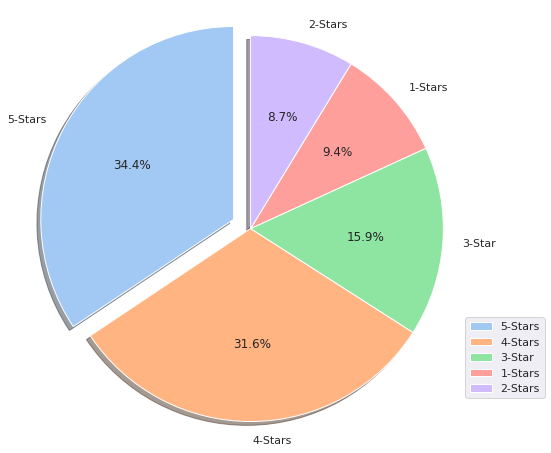

In [ ]:
labels = '5-Stars', '4-Stars', '3-Star', '1-Stars', '2-Stars'
sizes = df_review["stars_y"].value_counts()
colors = ['red', 'blue', 'orange', 'skyblue','green']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%', 
        shadow=True, startangle=90, explode=(0.1, 0.0, 0.0, 0.0, 0.0))


plt.legend(loc=(1, 0.1))
plt.axis('equal')
plt.show()

From the above Pie chart, ratings 5&4 take up the lion's share of the feedback from the customers

# Rating Model

## Loading clean data

In [ ]:
from tqdm import tqdm_notebook as tqdm

## Keep the same number of reviews in each star category
- We need to have the same proportion of reviews so that we can train the model better

In [ ]:
# all_labels = dict(df_review[['stars_y']].value_counts())

# all_labels

# df2 = df_review.copy()
# df2 = df2[0:0]

# for label in all_labels:
#   df2 = df2.append(df_review[df_review['stars_y'] == label[0]].head(4095), ignore_index=True)

# df2 = df2.reset_index(drop=True)

# df2[['stars_y']].value_counts()

# # Assign df2 to df_review
# df_review = df2

## Shufle the dataset

In [ ]:
# shuffle the DataFrame rows
df_review = df_review.sample(frac = 1)

df_review.head(4)

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date
28178,NaN,1.0,0:0-0:0,9:30-17:0,9:30-17:0,9:30-17:0,9:30-17:0,9:30-17:0,9:30-17:0,Nk5Hsw1SlRF6I1HcY5EGdA,49.126681,-123.181882,4.5,52,1,waffles,restaurants,food,bakeries,none,none,none,none,none,none,m94fSg0vHq7K7v8YSkD68g,4,3,1,1,"Had the original waffle here, and I must say i...",2016-07-02 22:22:31
42613,NaN,1.0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,14:0-0:0,14:0-0:0,qfnp0r-m9GAgo0S_Z5Pecw,49.170732,-122.894156,4.0,5,1,restaurants,pizza,none,none,none,none,none,none,none,none,DMHBmRedEXSjmQM2viKcVQ,5,0,0,0,The only place I order pizza from in the area....,2014-04-04 22:59:00
41729,NaN,2.0,6:30-23:0,6:30-23:0,6:30-23:0,6:30-23:0,6:30-23:0,6:30-23:0,6:30-23:0,mkp0Va3Vc6M98d11xAy8aA,49.309486,-123.042632,2.5,31,1,breakfast & brunch,restaurants,burgers,canadian (new),none,none,none,none,none,none,sCzOyuGb-tHTNhpd_wuU_Q,1,0,0,0,Avoid this White Spot. It's totally down at he...,2016-04-25 21:05:24
25815,NaN,1.0,7:0-21:0,7:0-21:0,7:0-21:0,7:0-21:0,7:0-21:0,7:0-21:0,7:0-21:0,b8hOuhfKH_NSacq22pw8Sg,49.257303,-123.090362,4.0,201,1,cafes,food,coffee & tea,restaurants,none,none,none,none,none,none,vQpDxr0VlsaQr65bO393vA,4,0,0,0,Cute coffee shop! A lot of baked book & food t...,2018-12-05 23:24:44


In [ ]:
# Text of each review and the stars rating, are loaded to separate lists

texts = []
stars = [df_review['stars_y'] for review in df_review]
pbar = tqdm(total=df_review.shape[0]+1)

for index, row in df_review.iterrows():
  # print(row)
  texts.append(row['text'])
  pbar.update(1)
  
pbar.close()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/46930 [00:00<?, ?it/s]

## TFID Vectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))

vectors = vectorizer.fit_transform(texts)

In [ ]:
# print(vectors)
texts

["Had the original waffle here, and I must say it wa a pleasant surprise! The batter wasn't cloyingly sweet like most other Belgian waffles; instead it wa only mildly so, and I wa surprised by the small sugar chunk in the mix that added to the texture and made up for the sweetness. Service wa attentive, and they even heated up my waffle for me! This spot is easy to miss, so look out for the shop sign they place outside their store!",
 'The only place I order pizza from in the area. Always fresh and hot with lot of cheese. $22 get u 2 large pizza with several topping and 2 can of pop. Staff is always friendly and delivery is prompt.',
 "Avoid this White Spot. It's totally down at heel--as if it's going under. The seat are ripped, the carpet is dirty, they ran out of menus, and the bar wa out of our liquor choices. And forget the washroom (although all WS washroom tend to be filthy). They were so unprepared for the Saturday dinner 'rush' (at 5:30) that the food took 25 minute to arrive. 

## Splitting dataset into Train and test Data¶

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.15, random_state=42, shuffle =False)

In [ ]:
X_train.shape

(39889, 921528)

In [ ]:
y_train.shape

(39889,)

## Fitting a Classifier and Making Predictions

In [ ]:
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(y_test[:5])
print("Predicted Ratings: ",end = "")
print(preds[:5])

Actual Ratings(Stars): 

1719     5
3526     4
36854    5
37965    4
37320    4
Name: stars_y, dtype: int64

Predicted Ratings: [5 5 5 5 4]


## Observations

In [ ]:
# Predicting for entire dataset

X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=0.99997, random_state=42, shuffle = False)
predict_all = classifier.predict(X_full_test)

In [ ]:
predicted_stars = list(predict_all)

print("Actual Ratings(Stars): ")
print(y_full_test[10000:10020])
print("\nPredicted Ratings: ",end = "")
print(predicted_stars[10000:10020])

Actual Ratings(Stars): 
44279    4
43745    4
17929    3
44817    5
35918    5
31798    5
34082    4
43554    4
29984    5
40845    3
11073    3
36709    3
17828    1
44838    5
35998    4
17758    5
9100     3
3299     5
1156     3
10027    1
Name: stars_y, dtype: int64

Predicted Ratings: [4, 4, 3, 5, 5, 5, 4, 4, 5, 3, 3, 3, 1, 5, 4, 5, 3, 5, 3, 1]


In [ ]:
df_review.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'business_id', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'user_id', 'stars_y', 'useful', 'funny', 'cool', 'text',
       'date'],
      dtype='object')

In [ ]:
df_new = df_review.iloc[:-1]

In [ ]:
len(df_new)

46928

In [ ]:
print("\nOriginal Reviews (with user bias)")
display(df_new.tail(10))
# print(len(df_review))
# print(len(predicted_stars))
print("\nUnbiased Reviews (with predicted rating )")
unbiased_reviews_dataset = df_new

# dropping actual ratings(stars) by user
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars_y',1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['stars_y'] = predicted_stars

display(unbiased_reviews_dataset.tail(10))


Original Reviews (with user bias)


,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,stars_y,useful,funny,cool,text,date
22377,NaN,2.0,0:0-0:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,qifKceDXL5NjfX3DaxY__g,49.249354,-123.089915,4.0,427,1,ice cream & frozen yogurt,desserts,food,none,none,none,none,none,none,none,JAfWo9aWGmN3dm7nyHWCBg,5,0,0,0,I went today for the first time and wa told th...,2018-08-01 05:56:10
30418,NaN,1.0,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-22:0,12:0-22:0,Thd2hkwftyCRcX998vCmAQ,49.276235,-123.114882,4.0,80,1,food,ice cream & frozen yogurt,none,none,none,none,none,none,none,none,lO_FaZrocR0x3dgoFk38zw,4,1,1,1,A small and quaint place. The decor is lovely ...,2016-08-15 19:05:13
44229,NaN,2.0,NaN,16:0-22:0,16:0-22:0,16:0-22:0,16:0-22:0,16:0-22:0,NaN,r-UGAU1-PsZ6HNZW237O-Q,49.283302,-123.106055,4.0,491,1,lounges,wine bars,nightlife,bars,food,tapas/small plates,american (new),restaurants,none,none,jsj-wlEmqnSfpJFdVJG2BQ,2,0,0,0,Over priced for what you get (6 almond ) 3 sli...,2017-12-17 18:16:34
17347,NaN,2.0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,PE_EEdnGHuCaa_1Kd4hE_Q,49.264299,-123.171709,4.5,14,1,vegan,restaurants,delicatessen,food,bakeries,desserts,none,none,none,none,a_1GCbJyOK-LMBuH0rM5RA,4,0,0,0,Amazing custom shaped graduation cake - made e...,2018-05-28 05:16:12
30114,NaN,3.0,0:0-0:0,7:0-22:0,7:0-22:0,8:0-21:0,9:0-20:0,9:0-20:0,8:0-21:0,ECjtMCqbg7d0x1VSkfs80Q,49.325950,-123.143120,3.5,76,1,health markets,grocery,juice bars & smoothies,organic stores,specialty food,food,none,none,none,none,RKZNpbYOnRaBL7UsB8jPmg,4,1,0,0,Whole Foods' 2-for-1 pizza Tuesdays make it so...,2012-10-07 03:24:40
14956,NaN,2.0,0:0-0:0,11:0-20:0,11:0-20:0,11:45-18:0,11:0-20:0,12:0-18:0,12:0-19:0,szPJyzsly0a5ZkehLAV1fA,49.282642,-123.115118,4.0,182,1,food,sushi bars,poke,japanese,restaurants,hawaiian,none,none,none,none,hN1jS9ib44raF_bPnhxaFg,4,0,0,0,"Well, I've been back a few times. Latest time,...",2019-03-27 02:51:51
17227,NaN,1.0,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,NaN,B1bE80mdyebL15IVtHrJRA,49.281310,-122.999140,4.0,128,1,restaurants,canadian (new),nightlife,bars,american (new),none,none,none,none,none,aBWMuRdHdYeikELLEjkuDw,5,2,0,0,"Love this place. Casual, upbeat atmosphere com...",2013-08-18 06:21:47
7782,NaN,2.0,16:30-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,VqlbLm9l_1xP_ntXss_K5w,49.218892,-122.968577,2.5,85,1,specialty food,mediterranean,ethnic food,restaurants,greek,pizza,food,none,none,none,sZOGhfMB7kyx5B9Wvv_eVw,2,3,1,0,"The atmosphere here is cute, quaint with lot o...",2015-01-05 18:49:00
15170,NaN,NaN,0:0-0:0,10:0-15:0,10:0-15:0,9:0-14:0,9:0-16:0,10:0-15:0,10:0-15:0,viUq9OyTgOGgcdyuNoey3w,49.280807,-123.085638,5.0,27,1,food,flowers & gifts,shopping,bakeries,cafes,restaurants,none,none,none,none,XkK7UeaxH23wNcZOjWNLYg,5,1,0,0,A very beautiful cozy cafe. Nice latte and tea...,2018-09-16 01:36:18
6830,NaN,3.0,12:0-20:0,12:0-20:0,12:0-20:0,12:0-20:0,14:0-20:0,10:30-21:0,10:30-20:0,stLI_6xiiWpS75gkTosMow,49.199581,-122.912847,2.5,110,1,seafood,restaurants,none,none,none,none,none,none,none,none,sfsFOojhbf2zU5LgE4QGEQ,5,1,0,1,I went to The Boathouse yesterday for happy ho...,2015-07-31 04:03:28



Unbiased Reviews (with predicted rating )


,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,useful,funny,cool,text,date,stars_y
22377,NaN,2.0,0:0-0:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,qifKceDXL5NjfX3DaxY__g,49.249354,-123.089915,4.0,427,1,ice cream & frozen yogurt,desserts,food,none,none,none,none,none,none,none,JAfWo9aWGmN3dm7nyHWCBg,0,0,0,I went today for the first time and wa told th...,2018-08-01 05:56:10,4
30418,NaN,1.0,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-22:0,12:0-22:0,Thd2hkwftyCRcX998vCmAQ,49.276235,-123.114882,4.0,80,1,food,ice cream & frozen yogurt,none,none,none,none,none,none,none,none,lO_FaZrocR0x3dgoFk38zw,1,1,1,A small and quaint place. The decor is lovely ...,2016-08-15 19:05:13,1
44229,NaN,2.0,NaN,16:0-22:0,16:0-22:0,16:0-22:0,16:0-22:0,16:0-22:0,NaN,r-UGAU1-PsZ6HNZW237O-Q,49.283302,-123.106055,4.0,491,1,lounges,wine bars,nightlife,bars,food,tapas/small plates,american (new),restaurants,none,none,jsj-wlEmqnSfpJFdVJG2BQ,0,0,0,Over priced for what you get (6 almond ) 3 sli...,2017-12-17 18:16:34,4
17347,NaN,2.0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,PE_EEdnGHuCaa_1Kd4hE_Q,49.264299,-123.171709,4.5,14,1,vegan,restaurants,delicatessen,food,bakeries,desserts,none,none,none,none,a_1GCbJyOK-LMBuH0rM5RA,0,0,0,Amazing custom shaped graduation cake - made e...,2018-05-28 05:16:12,4
30114,NaN,3.0,0:0-0:0,7:0-22:0,7:0-22:0,8:0-21:0,9:0-20:0,9:0-20:0,8:0-21:0,ECjtMCqbg7d0x1VSkfs80Q,49.325950,-123.143120,3.5,76,1,health markets,grocery,juice bars & smoothies,organic stores,specialty food,food,none,none,none,none,RKZNpbYOnRaBL7UsB8jPmg,1,0,0,Whole Foods' 2-for-1 pizza Tuesdays make it so...,2012-10-07 03:24:40,4
14956,NaN,2.0,0:0-0:0,11:0-20:0,11:0-20:0,11:45-18:0,11:0-20:0,12:0-18:0,12:0-19:0,szPJyzsly0a5ZkehLAV1fA,49.282642,-123.115118,4.0,182,1,food,sushi bars,poke,japanese,restaurants,hawaiian,none,none,none,none,hN1jS9ib44raF_bPnhxaFg,0,0,0,"Well, I've been back a few times. Latest time,...",2019-03-27 02:51:51,5
17227,NaN,1.0,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,NaN,B1bE80mdyebL15IVtHrJRA,49.281310,-122.999140,4.0,128,1,restaurants,canadian (new),nightlife,bars,american (new),none,none,none,none,none,aBWMuRdHdYeikELLEjkuDw,2,0,0,"Love this place. Casual, upbeat atmosphere com...",2013-08-18 06:21:47,4
7782,NaN,2.0,16:30-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,VqlbLm9l_1xP_ntXss_K5w,49.218892,-122.968577,2.5,85,1,specialty food,mediterranean,ethnic food,restaurants,greek,pizza,food,none,none,none,sZOGhfMB7kyx5B9Wvv_eVw,3,1,0,"The atmosphere here is cute, quaint with lot o...",2015-01-05 18:49:00,4
15170,NaN,NaN,0:0-0:0,10:0-15:0,10:0-15:0,9:0-14:0,9:0-16:0,10:0-15:0,10:0-15:0,viUq9OyTgOGgcdyuNoey3w,49.280807,-123.085638,5.0,27,1,food,flowers & gifts,shopping,bakeries,cafes,restaurants,none,none,none,none,XkK7UeaxH23wNcZOjWNLYg,1,0,0,A very beautiful cozy cafe. Nice latte and tea...,2018-09-16 01:36:18,5
6830,NaN,3.0,12:0-20:0,12:0-20:0,12:0-20:0,12:0-20:0,14:0-20:0,10:30-21:0,10:30-20:0,stLI_6xiiWpS75gkTosMow,49.199581,-122.912847,2.5,110,1,seafood,restaurants,none,none,none,none,none,none,none,none,sfsFOojhbf2zU5LgE4QGEQ,1,0,1,I went to The Boathouse yesterday for happy ho...,2015-07-31 04:03:28,1


In [ ]:
unbiased_reviews_dataset.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'business_id', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'user_id', 'useful', 'funny', 'cool', 'text', 'date',
       'stars_y'],
      dtype='object')

In [ ]:
unbiased_reviews_dataset.index

Int64Index([28178, 42613, 41729, 25815, 11017, 44777, 12654, 30367, 27415,
            23985,
            ...
            22377, 30418, 44229, 17347, 30114, 14956, 17227,  7782, 15170,
             6830],
           dtype='int64', length=46928)

In [ ]:
predicted_stars.append(4)
predicted_stars.append(3)

In [ ]:
len(predicted_stars)

46930

In [ ]:
unbiased_reviews_dataset.to_csv("Rest_rev_unbiased.csv", encoding='utf-8', index=False)

In [ ]:
new_reviews_dataset = pd.read_csv('Rest_rev_unbiased.csv', low_memory= False)
new_reviews_dataset.drop("BusinessAcceptsCreditCards", axis = 1,inplace=True)
display(new_reviews_dataset.tail(10))

,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,business_id,latitude,longitude,stars_x,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,user_id,useful,funny,cool,text,date,stars_y
46918,2.0,0:0-0:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,14:0-21:0,qifKceDXL5NjfX3DaxY__g,49.249355,-123.089915,4.0,427,1,ice cream & frozen yogurt,desserts,food,none,none,none,none,none,none,none,JAfWo9aWGmN3dm7nyHWCBg,0,0,0,I went today for the first time and wa told th...,2018-08-01 05:56:10,4
46919,1.0,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-22:0,12:0-22:0,Thd2hkwftyCRcX998vCmAQ,49.276235,-123.114882,4.0,80,1,food,ice cream & frozen yogurt,none,none,none,none,none,none,none,none,lO_FaZrocR0x3dgoFk38zw,1,1,1,A small and quaint place. The decor is lovely ...,2016-08-15 19:05:13,1
46920,2.0,NaN,16:0-22:0,16:0-22:0,16:0-22:0,16:0-22:0,16:0-22:0,NaN,r-UGAU1-PsZ6HNZW237O-Q,49.283302,-123.106055,4.0,491,1,lounges,wine bars,nightlife,bars,food,tapas/small plates,american (new),restaurants,none,none,jsj-wlEmqnSfpJFdVJG2BQ,0,0,0,Over priced for what you get (6 almond ) 3 sli...,2017-12-17 18:16:34,4
46921,2.0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,PE_EEdnGHuCaa_1Kd4hE_Q,49.264299,-123.171709,4.5,14,1,vegan,restaurants,delicatessen,food,bakeries,desserts,none,none,none,none,a_1GCbJyOK-LMBuH0rM5RA,0,0,0,Amazing custom shaped graduation cake - made e...,2018-05-28 05:16:12,4
46922,3.0,0:0-0:0,7:0-22:0,7:0-22:0,8:0-21:0,9:0-20:0,9:0-20:0,8:0-21:0,ECjtMCqbg7d0x1VSkfs80Q,49.325950,-123.143120,3.5,76,1,health markets,grocery,juice bars & smoothies,organic stores,specialty food,food,none,none,none,none,RKZNpbYOnRaBL7UsB8jPmg,1,0,0,Whole Foods' 2-for-1 pizza Tuesdays make it so...,2012-10-07 03:24:40,4
46923,2.0,0:0-0:0,11:0-20:0,11:0-20:0,11:45-18:0,11:0-20:0,12:0-18:0,12:0-19:0,szPJyzsly0a5ZkehLAV1fA,49.282642,-123.115118,4.0,182,1,food,sushi bars,poke,japanese,restaurants,hawaiian,none,none,none,none,hN1jS9ib44raF_bPnhxaFg,0,0,0,"Well, I've been back a few times. Latest time,...",2019-03-27 02:51:51,5
46924,1.0,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,NaN,B1bE80mdyebL15IVtHrJRA,49.281310,-122.999140,4.0,128,1,restaurants,canadian (new),nightlife,bars,american (new),none,none,none,none,none,aBWMuRdHdYeikELLEjkuDw,2,0,0,"Love this place. Casual, upbeat atmosphere com...",2013-08-18 06:21:47,4
46925,2.0,16:30-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,16:0-22:30,VqlbLm9l_1xP_ntXss_K5w,49.218892,-122.968577,2.5,85,1,specialty food,mediterranean,ethnic food,restaurants,greek,pizza,food,none,none,none,sZOGhfMB7kyx5B9Wvv_eVw,3,1,0,"The atmosphere here is cute, quaint with lot o...",2015-01-05 18:49:00,4
46926,NaN,0:0-0:0,10:0-15:0,10:0-15:0,9:0-14:0,9:0-16:0,10:0-15:0,10:0-15:0,viUq9OyTgOGgcdyuNoey3w,49.280807,-123.085638,5.0,27,1,food,flowers & gifts,shopping,bakeries,cafes,restaurants,none,none,none,none,XkK7UeaxH23wNcZOjWNLYg,1,0,0,A very beautiful cozy cafe. Nice latte and tea...,2018-09-16 01:36:18,5
46927,3.0,12:0-20:0,12:0-20:0,12:0-20:0,12:0-20:0,14:0-20:0,10:30-21:0,10:30-20:0,stLI_6xiiWpS75gkTosMow,49.199581,-122.912847,2.5,110,1,seafood,restaurants,none,none,none,none,none,none,none,none,sfsFOojhbf2zU5LgE4QGEQ,1,0,1,I went to The Boathouse yesterday for happy ho...,2015-07-31 04:03:28,1


## Evaluating our Classifier

The simplest way to assess such a system is to look at the percentage of time it correctly predicts the intended outcome. The name of this strategy is, unsurprisingly, accuracy. We can determine the accuracy of our system by comparing the expected and actual review numbers–if they are the same, our classifier accurately predicted the review. We multiply the total number of right answers by the total number of reviews in our test set. If this value is 1, it means our classifier was correct every time.

##Accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.5899147727272728


##Precision and Recall of the model

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.5759614570243989
Recall: 0.5899147727272728


##Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.67      0.73      0.70       678
           2       0.41      0.22      0.28       576
           3       0.50      0.41      0.45      1112
           4       0.54      0.55      0.54      2274
           5       0.66      0.77      0.71      2400

    accuracy                           0.59      7040
   macro avg       0.55      0.53      0.54      7040
weighted avg       0.58      0.59      0.58      7040



##Plotting Confusion Metrics

In [ ]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Plot non-normalized confusion matrix

Confusion matrix, without normalization


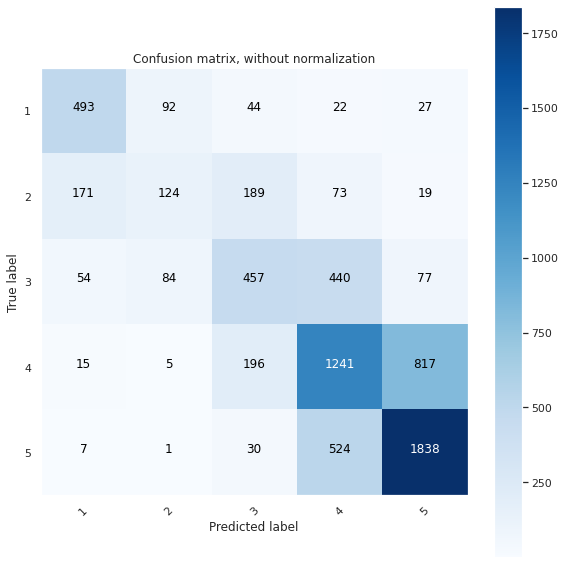

In [ ]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.grid(b=None)
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

## Plot normalized confusion matrix

Normalized confusion matrix


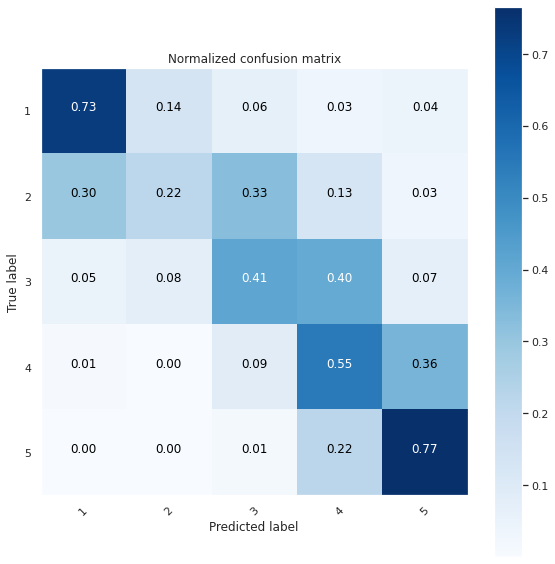

In [ ]:
plt.figure()
plt.grid(b=None)
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()